# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()


In [3]:
# read in readmissions data provided
hospital_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


In [4]:
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [5]:
hospital_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [6]:
data = hospital_df[hospital_df['Number of Discharges'] != 'Not Available']

In [9]:
data.loc[:,'Number of Discharges'] = data['Number of Discharges'].astype('int')
data = data.sort_values(by = 'Number of Discharges', ascending = True)

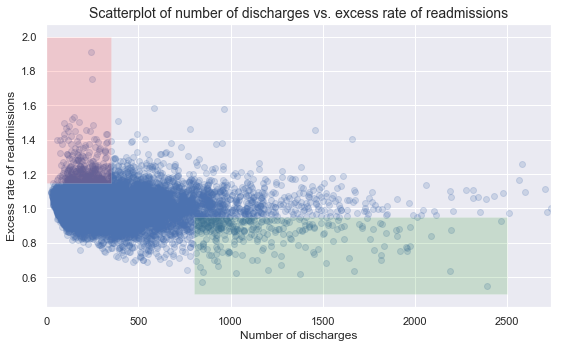

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in data ['Number of Discharges'][81:-3]]
y = list(data['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.



****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### A) 

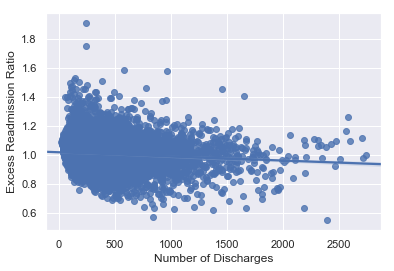

In [11]:
# Overall, rate of readmissions is trending down with increasing number of discharges
# we are going to fit a regression line to see the trend
sns.regplot(x = 'Number of Discharges', y = 'Excess Readmission Ratio', data = data[data['Number of Discharges'] < 3000] )

From the above plot we see that there's a slight negative correlation between number of discharges and excess readmission ratio. Let's look at the correlation matrix

In [12]:
data.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.009596,NaN,-0.012112,-0.009049,-0.003710,-0.009099
Number of Discharges,-0.009596,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.012112,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.009049,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.003710,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,-0.009099,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


***The correlation between number of discharges and excess readmission ratio is -0.0973 which is a weak negative correlation. Thus statement that rate of readmissions is trending down with increasing number of discharges is misleading***

In [13]:
data[data['Number of Discharges'] <= 350]['Excess Readmission Ratio'].median()

1.006

In [14]:
data[(data['Number of Discharges'] > 350) & (data['Number of Discharges'] <= 2500) ]['Excess Readmission Ratio'].median()

0.9981

#### Conclusion for Initial Observation:
- I largely disagree with the conclusions stated above
- the corelation between number of discharges and excess readmission ratio is very weak so we cannot say that rate of readmissions is trending down with increasing number of discharges
- I completetly disagree with 2. and 3 as it is based of the first statement's conclusion. Also when we look at the scatter plot, we see that both high and low dischages pretty much have excess ratios clusters between 1 to 1.2


In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [15]:
data[data['Number of Discharges'] < 100]['Excess Readmission Ratio'].mean()

1.0226183501683508

In [16]:
1.0 *data[(data['Number of Discharges'] < 100) & (data['Excess Readmission Ratio'] > 1)].shape[0]/ data[data['Number of Discharges'] < 100].shape[0]

0.5918045705279747

In [17]:
data[data['Number of Discharges'] > 1000]['Excess Readmission Ratio'].mean()

0.978335421166307

In [18]:
1.0 *data[(data['Number of Discharges'] > 1000) & (data['Excess Readmission Ratio'] > 1)].shape[0]/ data[data['Number of Discharges'] > 1000].shape[0]

0.4449244060475162

The mean excess readmission rate in both cases are accurate however the excess readmission rate greater than 1 for the first case in inaccurate. Also the mean value is insignificant as the number of samples in both cases( < 100 or > 1000) are very less hence we cannot conclude anyting from the results

Conclusions

***There is a significant correlation between hospital capacity (number of discharges) and readmission rates.***

***Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.***

- The first part has not true as discussed above.
- second conclusion is based on first hence not true either

recommendations are based on the fact that the conclusions are true. We cannot accept it at face value and need to come up with a more reliable way of testing reccomendations like hypothesis test as done in the next section.

## B)

First we need to figure out a way to categorize a hospital as small or large. One way of doing so is by looking at the median of the number of discharge.


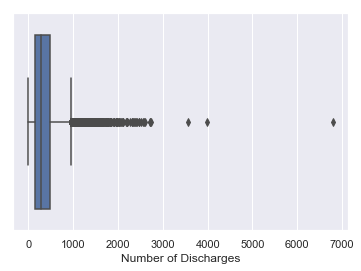

In [19]:
sns.boxplot(data['Number of Discharges'])

In [20]:
#since there are a few outliers, we use the medians instead of mean.
data['Number of Discharges'].median()

280.0

In [21]:
#small hospital
small_df = data[data['Number of Discharges'] < 280.0]
#big hospitals
big_df = data[data['Number of Discharges'] >= 280.0]

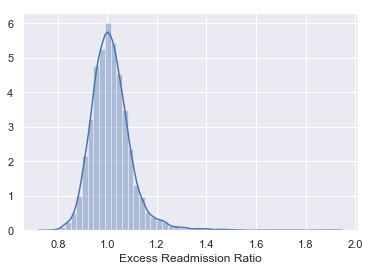

In [22]:
sns.distplot(small_df['Excess Readmission Ratio'].dropna())

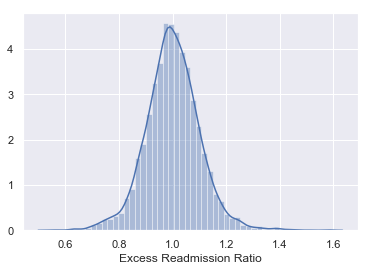

In [23]:
sns.distplot(big_df['Excess Readmission Ratio'].dropna())

we ploted the histograme of the excess readmission of both big and small hospitals. We see a difference in mean of excess readmission for big and small hospitals but is it statistically significant?. We check it via hypothesis testing. 

Using Hypothesis testing we can check if the difference in the mean of excess readmission for both small and big hospitals is statistically significant. ($\alpha$ = .01)

- H0: There is no difference in the  mean of excess readmission for big and small hospitals
- H1 : There is a difference in the  mean of excess readmission for big and small hospitals

In [24]:
small = small_df['Excess Readmission Ratio'].dropna()
big = big_df['Excess Readmission Ratio'].dropna()
stats.ttest_ind(small,big)

Ttest_indResult(statistic=8.20016888697563, pvalue=2.6552224551201087e-16)

p value is very small and less than .01 so we can reject the null hypothesis and accept the alternate hypothesis that There is a difference in the mean of excess readmission for big and small hospitals 

###  Statistical Significance and Practical Significance

The result obtained is statistically significant as we rejected the null hypothesis for statistical significance level $\alpha$=0.01

Let's  look at the range of excess readmission  for 99.7% (3 standard deviation) of the samples for both small and big hospitals.


In [25]:
L_range = big_df['Excess Readmission Ratio'].dropna().mean() - 3 * big_df['Excess Readmission Ratio'].dropna().std(), big_df['Excess Readmission Ratio'].dropna().mean() + 3 * big_df['Excess Readmission Ratio'].dropna().std()
S_range =  small_df['Excess Readmission Ratio'].dropna().mean() - 3 * small_df['Excess Readmission Ratio'].dropna().std(), small_df['Excess Readmission Ratio'].dropna().mean() + 3 * small_df['Excess Readmission Ratio'].dropna().std()

In [26]:
print(L_range)
print(S_range)

(0.6992921008313194, 1.3017904207576239)
(0.7688213157815403, 1.26031381651213)


99.7% of the samples for big and small hospitals lie in the above ranges respectively.The range are pretty close to each other so  the means is statistically significant but is not practically significant. Thus it's not a good idea to create policies based on the size of the hospitals.

We could look for features that are more strongly correlated to the excess readmission ratio and create policies based on that.

### ScatterPlot:

One advantage of scatterplot is that we can easily visualize the corellation between 2 ( at times 3) variables.

One disadvantage of scatterplot is that for large data, scatterplot can be misleading unless we fit a trend line or some thing.

### Another Way: Barplot

(0.8, 1.05)

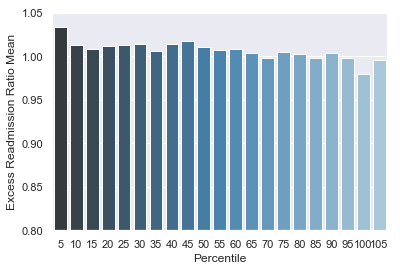

In [31]:
data['Size'] = data['Number of Discharges'].apply(lambda x: 1 if x >= 280 else 0)

mask = data['Excess Readmission Ratio'].isnull()
df3 = data[~mask]

df3 = df3.sort_values('Number of Discharges')
size = len(df3)
percentile_jump = int(round(size/20))

group_means = []

for i in range(0, size, percentile_jump):
    frame = df3.iloc[i:i+percentile_jump]
    group_means.append(frame['Excess Readmission Ratio'].mean())

percentiles = [5*i for i in range(1, len(group_means) + 1)]

sns.barplot(percentiles, group_means, palette="Blues_d")
plt.xlabel('Percentile')
plt.ylabel('Excess Readmission Ratio Mean')
plt.ylim((0.8,1.05))

